#  <font color=blue> ****Predicting Customer Behavior using machine learning algorithms**** </font>

## Introduction


Customer behavior analysis is crucial for businesses to better understand their customers' needs, preferences, and buying patterns. This understanding enables marketing teams to tailor their strategies more effectively, ensuring efficient outreach, increased customer satisfaction, and enhanced marketing strategies. Machine learning and predictive analysis are essential tools for uncovering insights from vast amounts of data, helping businesses identify customer needs and behavior trends. With the growing availability of customer data from sources like online transactions, social media, and customer service interactions, traditional analysis methods are becoming insufficient. As businesses struggle to extract meaningful insights, they face missed opportunities and inefficiencies in targeting and customer engagement efforts.

## Challenges

With the overwhelming volume of customer data, businesses face challenges in effectively harnessing this information to drive strategies. Traditional analysis methods fall short when it comes to analyzing the vast datasets now available. The main challenges include:

Extracting meaningful insights from large datasets to uncover key behavioral patterns and trends.
Missed opportunities due to the inability to fully leverage data for targeted marketing and customer engagement.
Inefficiencies in resource allocation because of limited insight into customer segmentation and responsiveness.

## Objective 

 An automobile company has plans to enter new markets with their existing products and after intensive market research, they’ve realized that the behavior of the new market is like their existing market. In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has worked exceptionally well for them. Accordingly, they plan to use the same strategy for the new markets.The objective of the project is to predict the appropriate customer segments(A,B,C,D ) in a new market based on the existing market behavior by leveraging  machine learning techniques thus hepls:

 -	Personalized marketing:   help the sales team to create highly targeted marketing campaigns focused on the interest and behaviors of specific customer groups, leading to a more satisfying customer experience
 
 -	Efficient resource allocation:  business can focus their marketing, sales, and product development effort on segments that respond positively which maximize revenue
 
 -	Increase customer retention:  by meeting the specific needs of each segment business can build relationships with customers, increasing loyalty and reducing churn 

## Dataset and Data fields :


The dataset includes information on customers in the existing market , with fields age, gender , martial status, education , profession , work experience , family size, spending score and de-idenified categories. 

## Import Necessary libraries

In [1]:
import pandas as pd # data processing , csv file(e.g. pd.read_s-csv)
import numpy as np  # linear algebra
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go  # data visualization
from plotly import tools
from plotly.subplots import make_subplots
from  sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing  import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from  sklearn.feature_selection import mutual_info_classif
import ipywidgets as widgets
import streamlit as st


plt.figure(figsize=(15,8))
sns.set(rc={'figure.figsize':(12,6)})


<Figure size 1500x800 with 0 Axes>

## Loading and Preprocessing the data

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/AbaditEstif/machine_learning/main/Train.csv")
test= pd.read_csv("https://raw.githubusercontent.com/AbaditEstif/machine_learning/main/Test.csv")

In [3]:
train.shape

(8068, 11)

In [4]:
train.duplicated().sum()

0

In [5]:
test.shape

(2627, 11)

In [6]:
test.duplicated().sum()

0

In [7]:
# Concatenate both train and test datasets


data = pd.concat([train,test])

### Data understanding 

My aim is to observe and study the categorical and numerical features of the dataset. by examining the unique value counts. I can understand the distribution and quality of the data and can get insights about the quality of the data,potential issues such as duplicates , imbalances and missing values.

In [8]:
print("Number of rows:", len(data))
data.head(10)

Number of rows: 10695


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [10]:
data.shape

(10695, 11)

In [11]:
# les rename Var_1 column for better understanding 

data= data.rename(columns={"Var_1":"Category"})

In [12]:
# Checking for misspelled or unsual values in columns


print("Gender:", data['Gender'].unique())
print("Ever_Maried:", data['Ever_Married'].unique())
print("Graduated:", data['Graduated'].unique())
print("Spending_Score:", data['Spending_Score'].unique())
print("Profession:", data['Profession'].unique())
print("Segmentation:", data['Segmentation'].unique())
print("Category:", data['Category'].unique())




Gender: ['Male' 'Female']
Ever_Maried: ['No' 'Yes' nan]
Graduated: ['No' 'Yes' nan]
Spending_Score: ['Low' 'Average' 'High']
Profession: ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Segmentation: ['D' 'A' 'B' 'C']
Category: ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']


### Statistical Analysis

we will use data.describe(), which will give a descriptive overview of the dataset

In [13]:
 # describe Numerical features
    
num_data= data.describe()
num_data.style.background_gradient(cmap='Oranges')



,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


The above table shows the count,mean standard deviation,min,25%,50%,75% and max values for each column and we can observe that:
- customer age ranges from 18 to  89 years old with mean of 43.5
- works experience ranges from 0 to 14 year with mean of 2.64
- family size ranges from 1 to 9 with  mean of 2.84


In [14]:
data.duplicated().sum()

38

In [15]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Category',
       'Segmentation'],
      dtype='object')

In [16]:
data['Age'].value_counts( dropna= False)

35    321
42    320
37    304
43    301
40    300
     ... 
75     37
78     36
76     36
80     33
85     32
Name: Age, Length: 67, dtype: int64

In [17]:
data['Age'].unique()

array([22, 38, 67, 40, 56, 32, 33, 61, 55, 26, 19, 70, 58, 41, 31, 79, 49,
       18, 36, 35, 45, 42, 83, 27, 28, 47, 29, 57, 76, 25, 72, 48, 74, 59,
       39, 51, 30, 63, 52, 60, 68, 86, 50, 43, 80, 37, 46, 69, 78, 71, 82,
       23, 20, 85, 21, 53, 62, 75, 65, 89, 66, 73, 77, 87, 84, 81, 88],
      dtype=int64)

In [18]:
print("Gender:", data['Gender'].value_counts( dropna= False)),'\n',

print("Graduated:", data['Graduated'].value_counts( dropna= False)),'\n',

print("Spending_Score:", data['Spending_Score'].value_counts( dropna= False))


Gender: Male      5841
Female    4854
Name: Gender, dtype: int64
Graduated: Yes    6570
No     4023
NaN     102
Name: Graduated, dtype: int64
Spending_Score: Low        6494
Average    2599
High       1602
Name: Spending_Score, dtype: int64


In [19]:
data['Profession'].value_counts(dropna=False)

Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
NaN               162
Name: Profession, dtype: int64

In [20]:
data['Work_Experience'].value_counts(dropna= False)

1.0     3127
0.0     3087
NaN     1098
9.0      613
8.0      612
2.0      373
4.0      346
3.0      337
5.0      270
6.0      265
7.0      256
14.0      66
10.0      64
11.0      64
12.0      60
13.0      57
Name: Work_Experience, dtype: int64

In [21]:
data['Family_Size'].value_counts(dropna= False)

2.0    3158
1.0    1965
3.0    1952
4.0    1823
5.0     812
NaN     448
6.0     290
7.0     122
8.0      65
9.0      60
Name: Family_Size, dtype: int64

### Checking and Handling missing values

In [22]:
# checking missing values

data.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Category            108
Segmentation          0
dtype: int64

 ### Handling missing values

I will use imputing mechanism to fill the missing value and use mode for categorical columns and median for numerical columns.


In [23]:
# Replacing missing values in categorical columns with mode and Numerical columns with median

data['Family_Size'].fillna(data['Family_Size'].median(),inplace=True)
data['Work_Experience'].fillna(data['Work_Experience'].median(),inplace=True)

data['Graduated'].fillna(data['Graduated'].mode()[0],inplace=True)
data['Ever_Married'].fillna(data['Ever_Married'].mode()[0],inplace=True)
data['Profession'].fillna(data['Profession'].mode()[0],inplace=True)
data['Category'].fillna(data['Category'].mode()[0],inplace=True)


In [24]:
data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Category           0
Segmentation       0
dtype: int64

In [25]:
data.shape

(10695, 11)

###  Checking and handling outliers

Outliers can be detected using visualizations, implementing mathematical formulas on the dataset or using statistical 
approach.

### Visualizing and removing outliers using Box plot

It captures the summary of the data with a simple box and whiskers and summarizes using 25th ,50th and 75th percentiles.
And it can help us to get insights (quartiles, median and outliers ) of the data , potential outliers and understand the
centeral tendency,

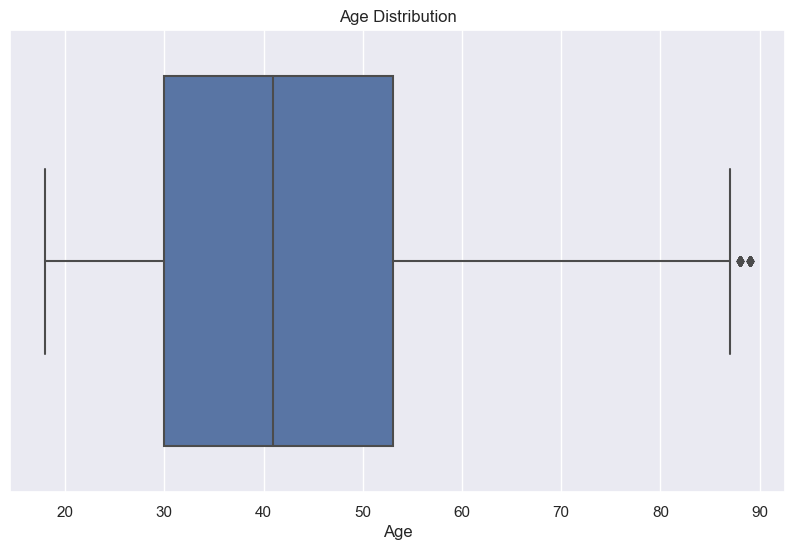

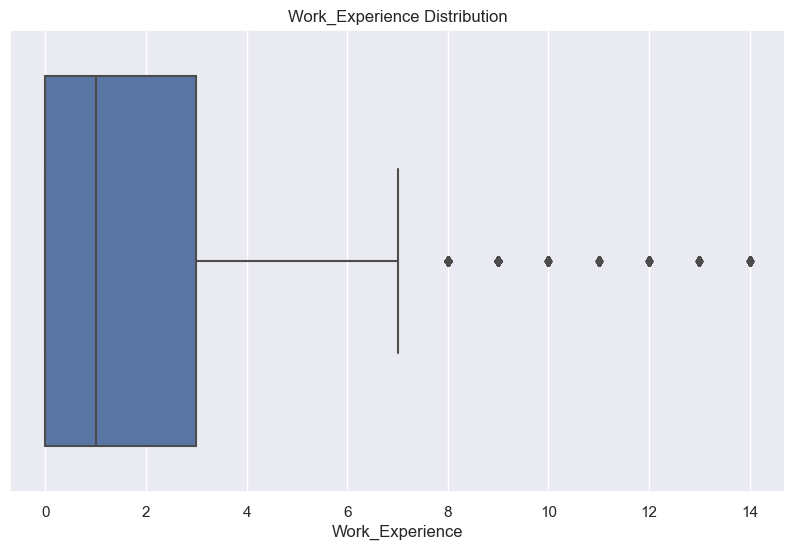

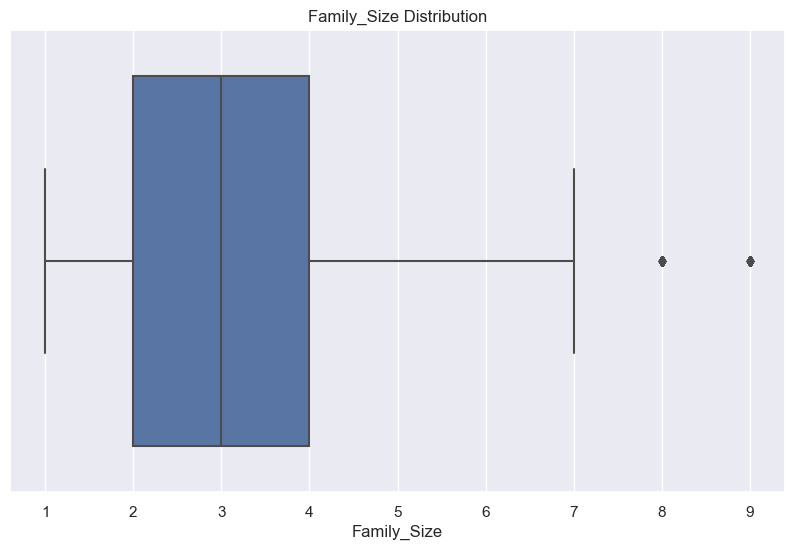

In [26]:
# Checking outlier for the numerical features

numerical_cols=['Age','Work_Experience','Family_Size']

for column in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=data[column])
    plt.title(f'{column} Distribution')
    plt.show()




From the above graph we can observe that work_experience values above 10 are acting as outliers. To address those outliers I will apply IQR(Inter Quartile Range). IQR is the most commonly used and most trusted approach used in the resarch field.
- IQR= Quartile3-Quartile1, this formula  will provide a measure of the spread of the middle 50% of the data in the work_experience columns .
 
 - I am calculating the interquartile rage(IQR) for work experience column,
 - first computes the first quartile (Q1) and third quartile(Q3) using the midpoint method, then calcualte thr IQR as the difference between Q3 and Q1, providing the middle 50% of work experience.

In [27]:
Q1 = np.percentile(data['Work_Experience'], 25 , method ='midpoint')

Q3= np.percentile(data['Work_Experience'], 75, method ='midpoint')

IQR= Q3-Q1

print(IQR)

3.0


In [28]:
# let define the upper and lower bound (1.5*IQR)

# Above Uper bound

upper =Q3+1.5*IQR

upper_array =np.array(data['Work_Experience']>= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below lower bound

lower= Q1-1.5*IQR
lower_array = np.array(data['Work_Experience']<= lower)
print("Lower Bound:", lower)
print(lower_array.sum())
 
    

Upper Bound: 7.5
1536
Lower Bound: -4.5
0


In [29]:
# let remove the outlier from work experience column

data['Work_Experience']= data['Work_Experience'].apply(lambda x: lower if x<lower else(upper if x>upper else x))


In [30]:
print(data['Work_Experience'].describe())

count    10695.000000
mean         2.208322
std          2.689670
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          7.500000
Name: Work_Experience, dtype: float64


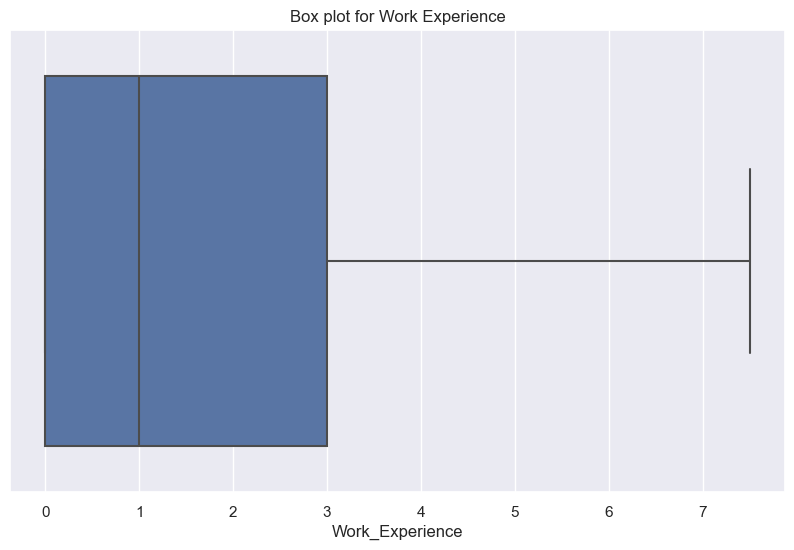

In [31]:
# let examine the modified work experience after removal of the outliers

plt.figure(figsize=(10,6))
sns.boxplot(x= data['Work_Experience'])
plt.title('Box plot for Work Experience')
plt.show()

## Exploratory Data Analysis(EDA)

EDA is a crucial step in the data analysis process as it helps studying, exploring, and visualizing information to derive important insights by using statistical tools and visualizations.It aids to find patterns, trends, and relationships between the variables.

### Univariate Analysis

Univare analysis involves looking at the distribution of a single variable.It is an brilliant way to understand a dataset’s range and spread of data. I will use plotly  to create univariate plots quickly.

#### Calculate Summary Statistics For the Age of the Customer

In [32]:
data['Age'].mean()

43.51182795698925

In [33]:
data['Age'].median()

41.0

In [34]:
data['Age'].std()

16.774158162521665

In [35]:
# create frequency table for 'Age'

data['Age'].value_counts()

35    321
42    320
37    304
43    301
40    300
     ... 
75     37
78     36
76     36
80     33
85     32
Name: Age, Length: 67, dtype: int64

In [132]:
fig= px.histogram(data, x="Age", nbins=20, title= "Age Distribution", template="presentation", text_auto=True)
fig.update_layout(bargap=0.1)
fig.show()


#### Percentage distribution of Customer segments

In [37]:
px.pie(data, names= 'Segmentation', title ="Percentage of each segment",template="presentation")

####  Gender Distribution  

In [38]:


gender= data.groupby(["Gender"]).size().rename("count").reset_index()

In [39]:
gender.head()

,Gender,count
0,Female,4854
1,Male,5841


In [40]:
px.bar(gender, x="Gender",y="count",color="Gender",text="count", color_discrete_sequence=["gray","green"], title="Distribution of Gender ",
      template="presentation")

####  Distribution of the customer’s professional inclination 

In [41]:
profession= data.groupby(["Profession"]).size().rename("count").reset_index()

In [42]:
profession.head()

,Profession,count
0,Artist,3480
1,Doctor,930
2,Engineer,935
3,Entertainment,1250
4,Executive,775


In [43]:
px.bar(profession, x="Profession",y="count", color="Profession", text="count", title= " Distribution of Profession ",
      template="presentation")

In [44]:
#fig= make_subplots(rows= 1,cols=2)
#fig.add_trace(go.bar(x=data['Graduated'].value_counts().index,y=data['Graduated'].value_counts().values),row=1,col=1)
#fig.show()

In [45]:
 px.pie(data_frame= profession, values="count", names="Profession",color="Profession",title=" Distribution of Profession ",
       template="presentation", width= 800,height=600,hole=0.5)

#### Distribution of Marital Status 

In [46]:
marital_status= data.groupby(["Ever_Married"]).size().rename("count").reset_index()

In [47]:
marital_status.head()

,Ever_Married,count
0,No,4342
1,Yes,6353


In [48]:
px.bar(marital_status, x= "Ever_Married",y="count",color="Ever_Married", text="count", color_discrete_sequence=["brown","gray"],
      template="presentation")

In [49]:
px.pie(data_frame= marital_status, values="count", names="Ever_Married", color="Ever_Married", title= "Marital Status of the Customer",
      template="presentation")

#### Distribution  of Educational Level 

In [50]:
grad= data.groupby(["Graduated"]).size().rename("count").reset_index()

In [51]:
grad.head()

,Graduated,count
0,No,4023
1,Yes,6672


In [52]:
px.pie(data_frame= grad,values="count", names="Graduated", color="Graduated", title= " Is the Customer Graduate ", template="presentation") 

####   Work Experience in years

In [53]:
work= data.groupby(["Work_Experience"]).size().rename("count").reset_index()

In [54]:
work.tail()

,Work_Experience,count
4,4.0,346
5,5.0,270
6,6.0,265
7,7.0,256
8,7.5,1536


In [55]:
px.bar(work, x="Work_Experience",y="count", text="count", title= "Work Experience in Years", hover_name="Work_Experience",
       color= "Work_Experience",color_discrete_sequence=["orange","red","yellow","brown","gray","blue","purple"],orientation="v",
      template="presentation")

####   Spending Score of the Customer

In [56]:
score= data.groupby(["Spending_Score"]).size().rename("count").reset_index()

In [57]:
score.head()

,Spending_Score,count
0,Average,2599
1,High,1602
2,Low,6494


In [58]:
pie_chart= px.pie(data_frame= score, values= 'count', names='Spending_Score',color='Spending_Score',
                  title= 'Spending Score of the Customer',width= 800,height=500,hole=0.6,template="presentation")
pie_chart.show()

**Here are some insights regarding the spendig behavior of the customers**

**Majority of Customers Are Low Spenders (60.7%)**: A significant portion of the customer base falls into the low spending category. This suggests that many customers may not be fully engaged with the products, or they may be price-sensitive. Understanding the factors driving this low engagement could help the automobile company to develop targeted marketing strategies to encourage higher spending.

**Moderate Engagement with Average Spenders (24.3%)**: About a quarter of the customers are classified as average spenders. This group might be more responsive to promotional efforts. Consider tailoring marketing campaigns that specifically target this segment to encourage them to move into the high spending category.

**Small Percentage of High Spenders (15%)**: The relatively small proportion of high spenders indicates that there is a niche audience that generates a disproportionate amount of revenue. It's important to identify the characteristics and behaviors of these customers. Fostering loyalty among this group through personalized marketing, rewards programs, or exclusive offers could further enhance their spending.


####  Family members for the customer

In [59]:
family= data.groupby(["Family_Size"]).size().rename("count").reset_index()

In [60]:
family.tail()

,Family_Size,count
4,5.0,812
5,6.0,290
6,7.0,122
7,8.0,65
8,9.0,60


In [61]:
bar_chart = px.bar(family, x="Family_Size",y="count", text="count", title= "Family Size of the Customer", hover_name="Family_Size",
       color= "Family_Size",color_discrete_sequence=["orange","red","yellow","brown","gray","blue","purple"],
                template="presentation")
bar_chart.show()

In [62]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Category',
       'Segmentation'],
      dtype='object')

#### Analysis of Anonymised Category for the Customer

In [63]:
Anonymized_cat= data.groupby(["Category"]).size().rename("count").reset_index()

In [64]:
Anonymized_cat.head()

,Category,count
0,Cat_1,167
1,Cat_2,563
2,Cat_3,1089
3,Cat_4,1475
4,Cat_5,114


In [65]:
pie_chart= px.pie(Anonymized_cat, names="Category", values="count",
                  title= "Percentage of Anonymized category for the Customer", template="presentation")
pie_chart.show()

### Bivariate Analysis

Bivariate analysis looks at the relationship between two variables and gives us a better understanding of how the two variables interact.

**Visualize the distribution of Numerical features (Age, work_experience  and family size) against the target variable (Segmentation) usign violin plots**



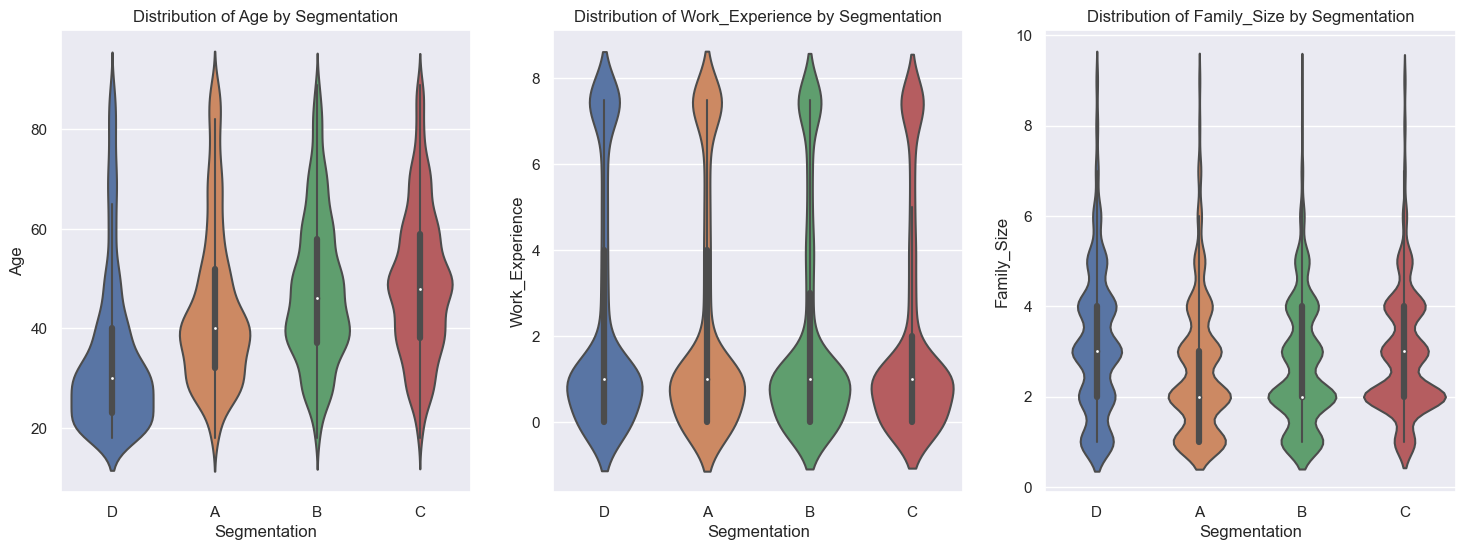

In [66]:
# Define the features and the target variable
features = ['Age', 'Work_Experience', 'Family_Size']
target_variable = 'Segmentation'
# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(18, 6))
# Create violin plots for each feature

for ax, feature in zip(axes, features):
    sns.violinplot(x=target_variable, y=feature, data=data, ax=ax)
    ax.set_title(f'Distribution of {feature} by {target_variable}')
    ax.set_xlabel(target_variable)
    ax.set_ylabel(feature)


**The following observations can be derived from the above plots**

**AGE**
- *Segment D*: Age Range: The distribution is spread from around 20 to 80+ years
- Median Age:The median age seems to be closer to 40:
- Density: There is a slightly higher density around the ages of 30-40 and another around 50-60, indicating two subgroups within this segment.

- Segment A: Age Range: Segment A's age distribution spans from 20 to 80.
- Medain Age:The median age for Segment A is also around 40 years.
- Density: The distribution is slightly more concentrated around the ages of 30-40, meaning more individuals in this segment are younger or middle-aged.

- Segment B: Age Rang: he distribution for Segment B spans from around 20 to 80 years as well. 
- Median Age: The median is around 40 years
- Density: Segment C appears to have a relatively even distribution of ages, with slight concentrations in the middle-age range (30-50).

- Segment C: Age Range: Segment C exhibits a similar age range of 20 to 80 years.
- Median Age: The median is around 40 years.
- Density: Segment C appears to have a relatively even distribution of ages, with slight concentrations in the middle-age range (30-50)


**Work_Experience**

- Key Takeawys: - Low Median Work Experience: Across all segments, the median work experience is consistently low, around 1-2 years. This suggests that the majority of individuals across these segments have relatively little work experience. - Segment D and A: These segments show broader distributions of work experience, with more individuals having moderate to higher levels of experience (up to 4-6 years), compared to Segments B and C - Segment C: This segment has the tightest distribution of work experience, with a strong concentration around low levels of experience (1 year), indicating that most individuals in Segment C are early in their career or have relatively little work experience

**Family_Size**

- Key Takeaways:- Consistent Median Family Size: Across all segments, the median family size is consistently around 2, meaning that the typical family size in all segments is around 2 members. - Distribution and Density: In all segments, family sizes of 1, 2, and 3 are the most frequent, while larger family sizes (above 4) are less common. Segment C seems to have a slightly narrower distribution, with fewer large families. - Segment D: Shows a bit more spread in family size values, with some larger family sizes appearing more frequently compared to other segments. - Segment C: Has a more compact distribution, indicating fewer families with large sizes compared to other segments.



#### Customer Segmentation based on Gender

In [67]:
gender_based= pd.pivot_table(data, values='ID',index=['Gender'],columns=['Segmentation'],aggfunc=np.count_nonzero)

In [68]:
gender_based

Segmentation,A,B,C,D
Gender,,,,
Female,1302,1098,1145,1309
Male,1516,1310,1297,1718


In [69]:
fig= px.histogram(data, x="Segmentation", color= "Gender", template="presentation", title="Segmentation based on Gender")
                 
fig.update_layout(bargap=0.1)
fig.show()

####  Segmentation based on Martial Status

In [70]:
married_based= pd.pivot_table(data, values='ID',index=['Ever_Married'],columns=['Segmentation'],aggfunc=np.count_nonzero)

married_based

Segmentation,A,B,C,D
Ever_Married,,,,
No,1148,665,530,1999
Yes,1670,1743,1912,1028


In [71]:
fig= px.histogram(data, x="Ever_Married",color="Segmentation",barmode="group",template="presentation",
           width=1000,height=600, title= "Segmentation based on Marital Status")
fig.update_layout(bargap=0.2)
fig.show()

#### Segmentation based on Graduated

In [72]:
grad_based= pd.pivot_table(data,values='ID',index=['Graduated'],columns=['Segmentation'],aggfunc=np.count_nonzero)

grad_based

Segmentation,A,B,C,D
Graduated,,,,
No,1053,696,487,1787
Yes,1765,1712,1955,1240


In [73]:
fig= px.histogram(data, x="Graduated",color="Segmentation",barmode="group",template="presentation",
           width=1000,height=600, title= "Customer Segmentation based on Education Level")
fig.update_layout(bargap=0.2)
fig.show()

#### Segmentation based on Spending score

In [74]:
spending_based= pd.pivot_table(data, values= 'ID',index=['Spending_Score'],columns=['Segmentation'],aggfunc=np.count_nonzero)

spending_based

Segmentation,A,B,C,D
Spending_Score,,,,
Average,537,739,1043,280
High,393,467,504,238
Low,1888,1202,895,2509


In [75]:
fig= px.bar(data, x="Segmentation",color="Spending_Score", barmode="group",template="presentation",
            title= "Customer Segmentation based on Spending Score")
fig.update_layout(bargap=0.2)
fig.show()

#### Segmentation based on Profession

In [76]:
prof_based= pd.pivot_table(data, values= 'ID',index=['Profession'],columns=['Segmentation'],aggfunc=np.count_nonzero)

prof_based

Segmentation,A,B,C,D
Profession,,,,
Artist,868,965,1270,377
Doctor,282,199,174,275
Engineer,340,241,121,233
Entertainment,464,295,199,292
Executive,183,216,211,165
Healthcare,233,159,178,1180
Homemaker,95,76,44,113
Lawyer,264,203,196,181
Marketing,89,54,49,211


In [77]:
fig= px.bar(data, x="Segmentation",color="Profession", barmode="group",template="presentation",
            title= " Segmentation based on Profession")
fig.update_layout(bargap=0.2)
fig.show()

#### Segmentation based on Work Experience

In [78]:
work_based= pd.DataFrame(data.groupby('Segmentation')['Work_Experience'].mean())
work_based

,Work_Experience
Segmentation,
A,2.338893
B,2.040075
C,1.981572
D,2.403535


In [79]:
fig= px.bar(work_based, x= work_based['Work_Experience'].index, color= "Work_Experience", template="presentation", title="Segmentation based on Work_Experience")
                 
fig.update_layout(bargap=0.1)
fig.show()

#### Segmentation based o Family Size

In [80]:
family_based= pd.DataFrame(data.groupby('Segmentation')['Family_Size'].agg(pd.Series.mode))

family_based

,Family_Size
Segmentation,
A,2.0
B,2.0
C,2.0
D,3.0


In [81]:
fig= px.bar(family_based, x= family_based['Family_Size'].index, color= "Family_Size", template="presentation", title="Segmentation based on Family Size")
                 
fig.show()

#### Segmentation based on Category

In [82]:
var_based= pd.pivot_table(data, values= 'ID',index=['Category'],columns=['Segmentation'],aggfunc=np.count_nonzero)

var_based

Segmentation,A,B,C,D
Category,,,,
Cat_1,44,31,32,60
Cat_2,126,135,123,179
Cat_3,316,239,197,337
Cat_4,450,320,177,528
Cat_5,28,23,21,42
Cat_6,1783,1603,1836,1796
Cat_7,71,57,56,85


In [83]:
fig= px.bar(data, x="Segmentation",color="Category", barmode="group",template="presentation",
            title= " Segmentation based Category")
fig.update_layout(bargap=0.2)
fig.show()

#### Segmentation based on Age

In [84]:
age_based= pd.DataFrame(data.groupby('Segmentation')['Age'].mean())

age_based

,Age
Segmentation,
A,44.399574
B,47.696844
C,49.260033
D,34.718864


In [85]:
fig= px.bar(age_based, x= age_based['Age'].index, color= "Age", template="presentation", title="Segmentation based on Age")
                 
fig.show()

 **Some Insights from the above charts**
 
 - Segment D is more dominant among non-graduates, suggesting that customers without a higher level of education may have different behaviors or preferences that align them with this particular segment.
- Segments A, B, and C are more common among graduates, indicating that education level might positively influence customer behavior, leading them to higher-value segments

- Customers in Segments D and A tend to have low spending scores, suggesting they may need different strategies to increase their spending.
- Segments B and C appear more diverse in spending behavior, indicating a potential to target these groups for upselling or personalized offers.
- Segment D has the highest count of both male and female customers
- The gender distribution across Segments B, C, and A is fairly balanced, with a similar proportion of male and female customers in each.
- The consistent ratio of males to females in most segments suggests that gender might not be a significant differentiator in customer behavior for these segments.

**Segment C (Lowest Unmarried, Highest Married)**: 

- Family-Oriented Campaigns: Focus on family-friendly products or services. Highlight benefits that cater to family life, such as discounts for family outings or family packs

**Segment D (Highest Unmarried, Lowest Married)**

- Single Lifestyle Promotion: Tailor marketing messages to celebrate the single lifestyle. Promote products or experiences that enhance social activities and personal growth.

**Segment A, B, C (Mostly Artists, Least Marketing)**

- Visual Marketing: Use visually appealing content in campaigns that resonate with the artistic sensibilities of these segments. Consider using platforms like Instagram and P Tailored Offers: 

- Create offers specifically for artists, such as discounts on art supplies or tools. Highlight how your products can enhance their creativity. 

**Segment D (Dominated by Healthcare, Least Homemaker)**

- Health-Focused Products: Tailor marketing messages around wellness, self-care, and preventive health. Highlight products that promote a healthy lifestyle.

- Partnerships with Healthcare Providers: Collaborate with clinics or wellness centers to offer exclusive promotions, further establishing your brand in the healthcare community




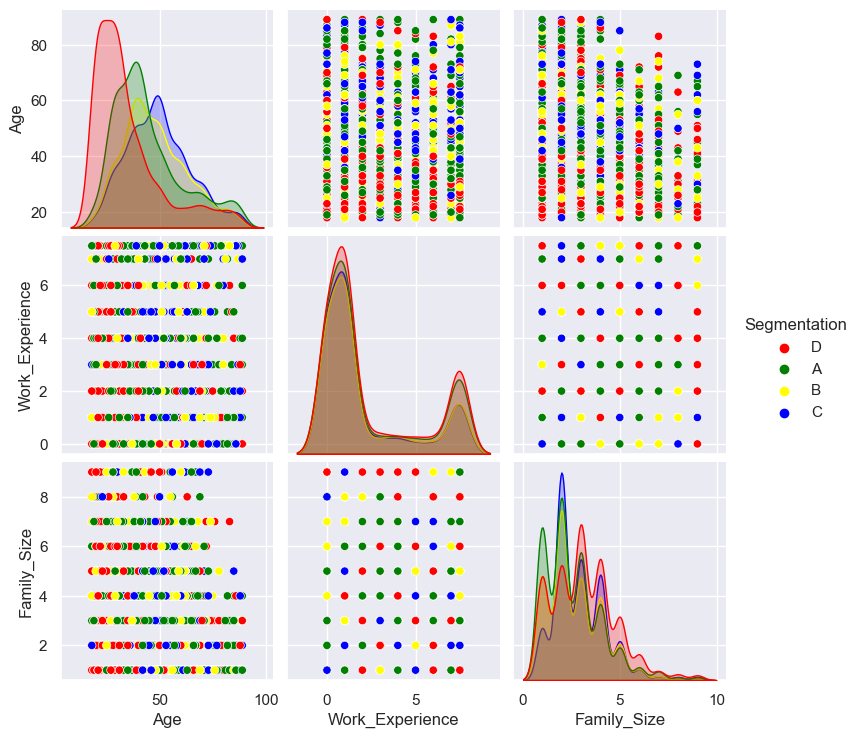

In [86]:
sns.pairplot(data =data[['Age','Graduated','Work_Experience','Family_Size','Segmentation']], hue='Segmentation', palette=["Red","Green","yellow",
                                                                                                     "blue"])
plt.show()

#### Spending score based on Gender

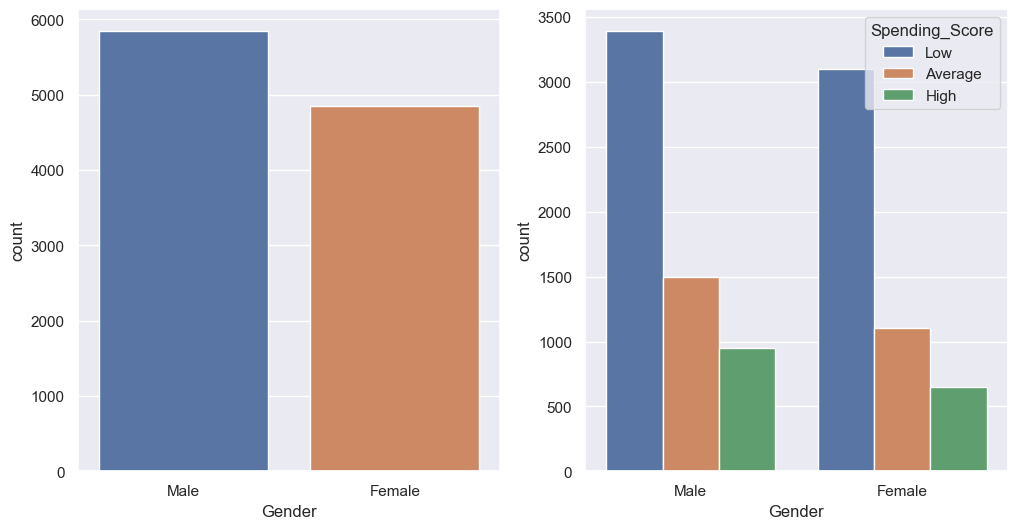

In [87]:
fig, axes=plt.subplots(1,2)

sns.countplot(data=data, x='Gender',ax= axes[0])

sns.countplot(data=data, x='Gender',hue='Spending_Score',ax=axes[1])
plt.show()

#### Spending Score Based on Profession

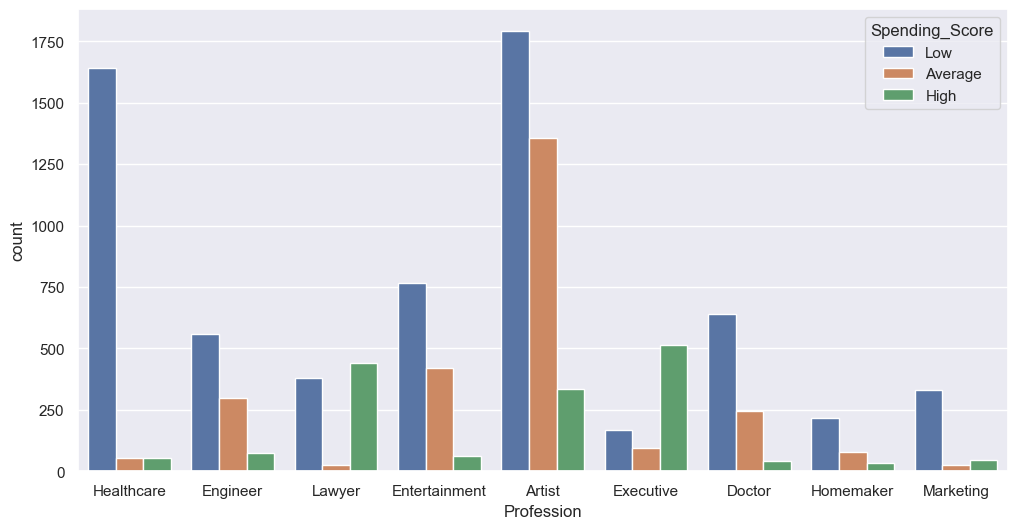

In [88]:
sns.countplot(data=data, x='Profession',hue='Spending_Score')
plt.show()

####  Spending Score based on Family Size

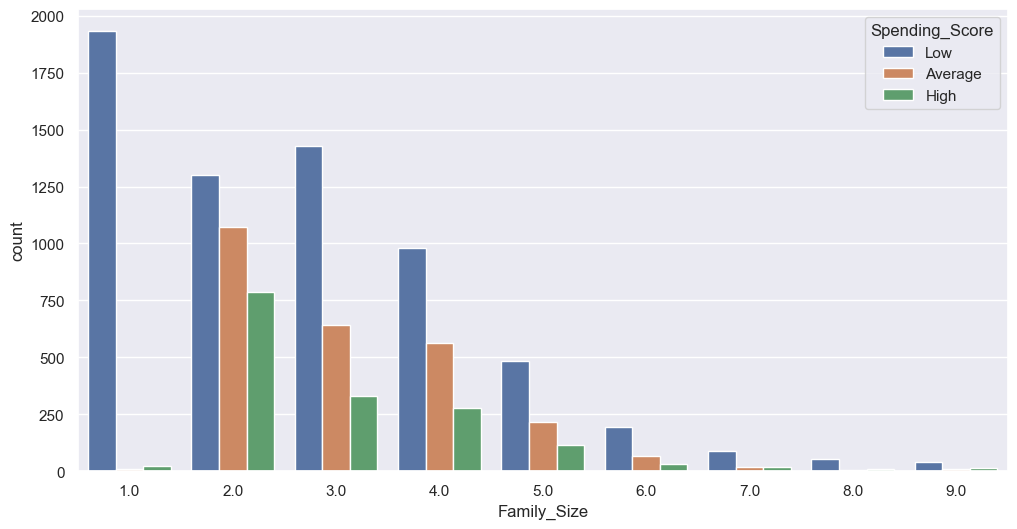

In [89]:
sns.countplot(data= data, x='Family_Size',hue='Spending_Score')
plt.show()

**Utilized Count plots to visualize the distribution of categorical features and their correlation with Segmentation**

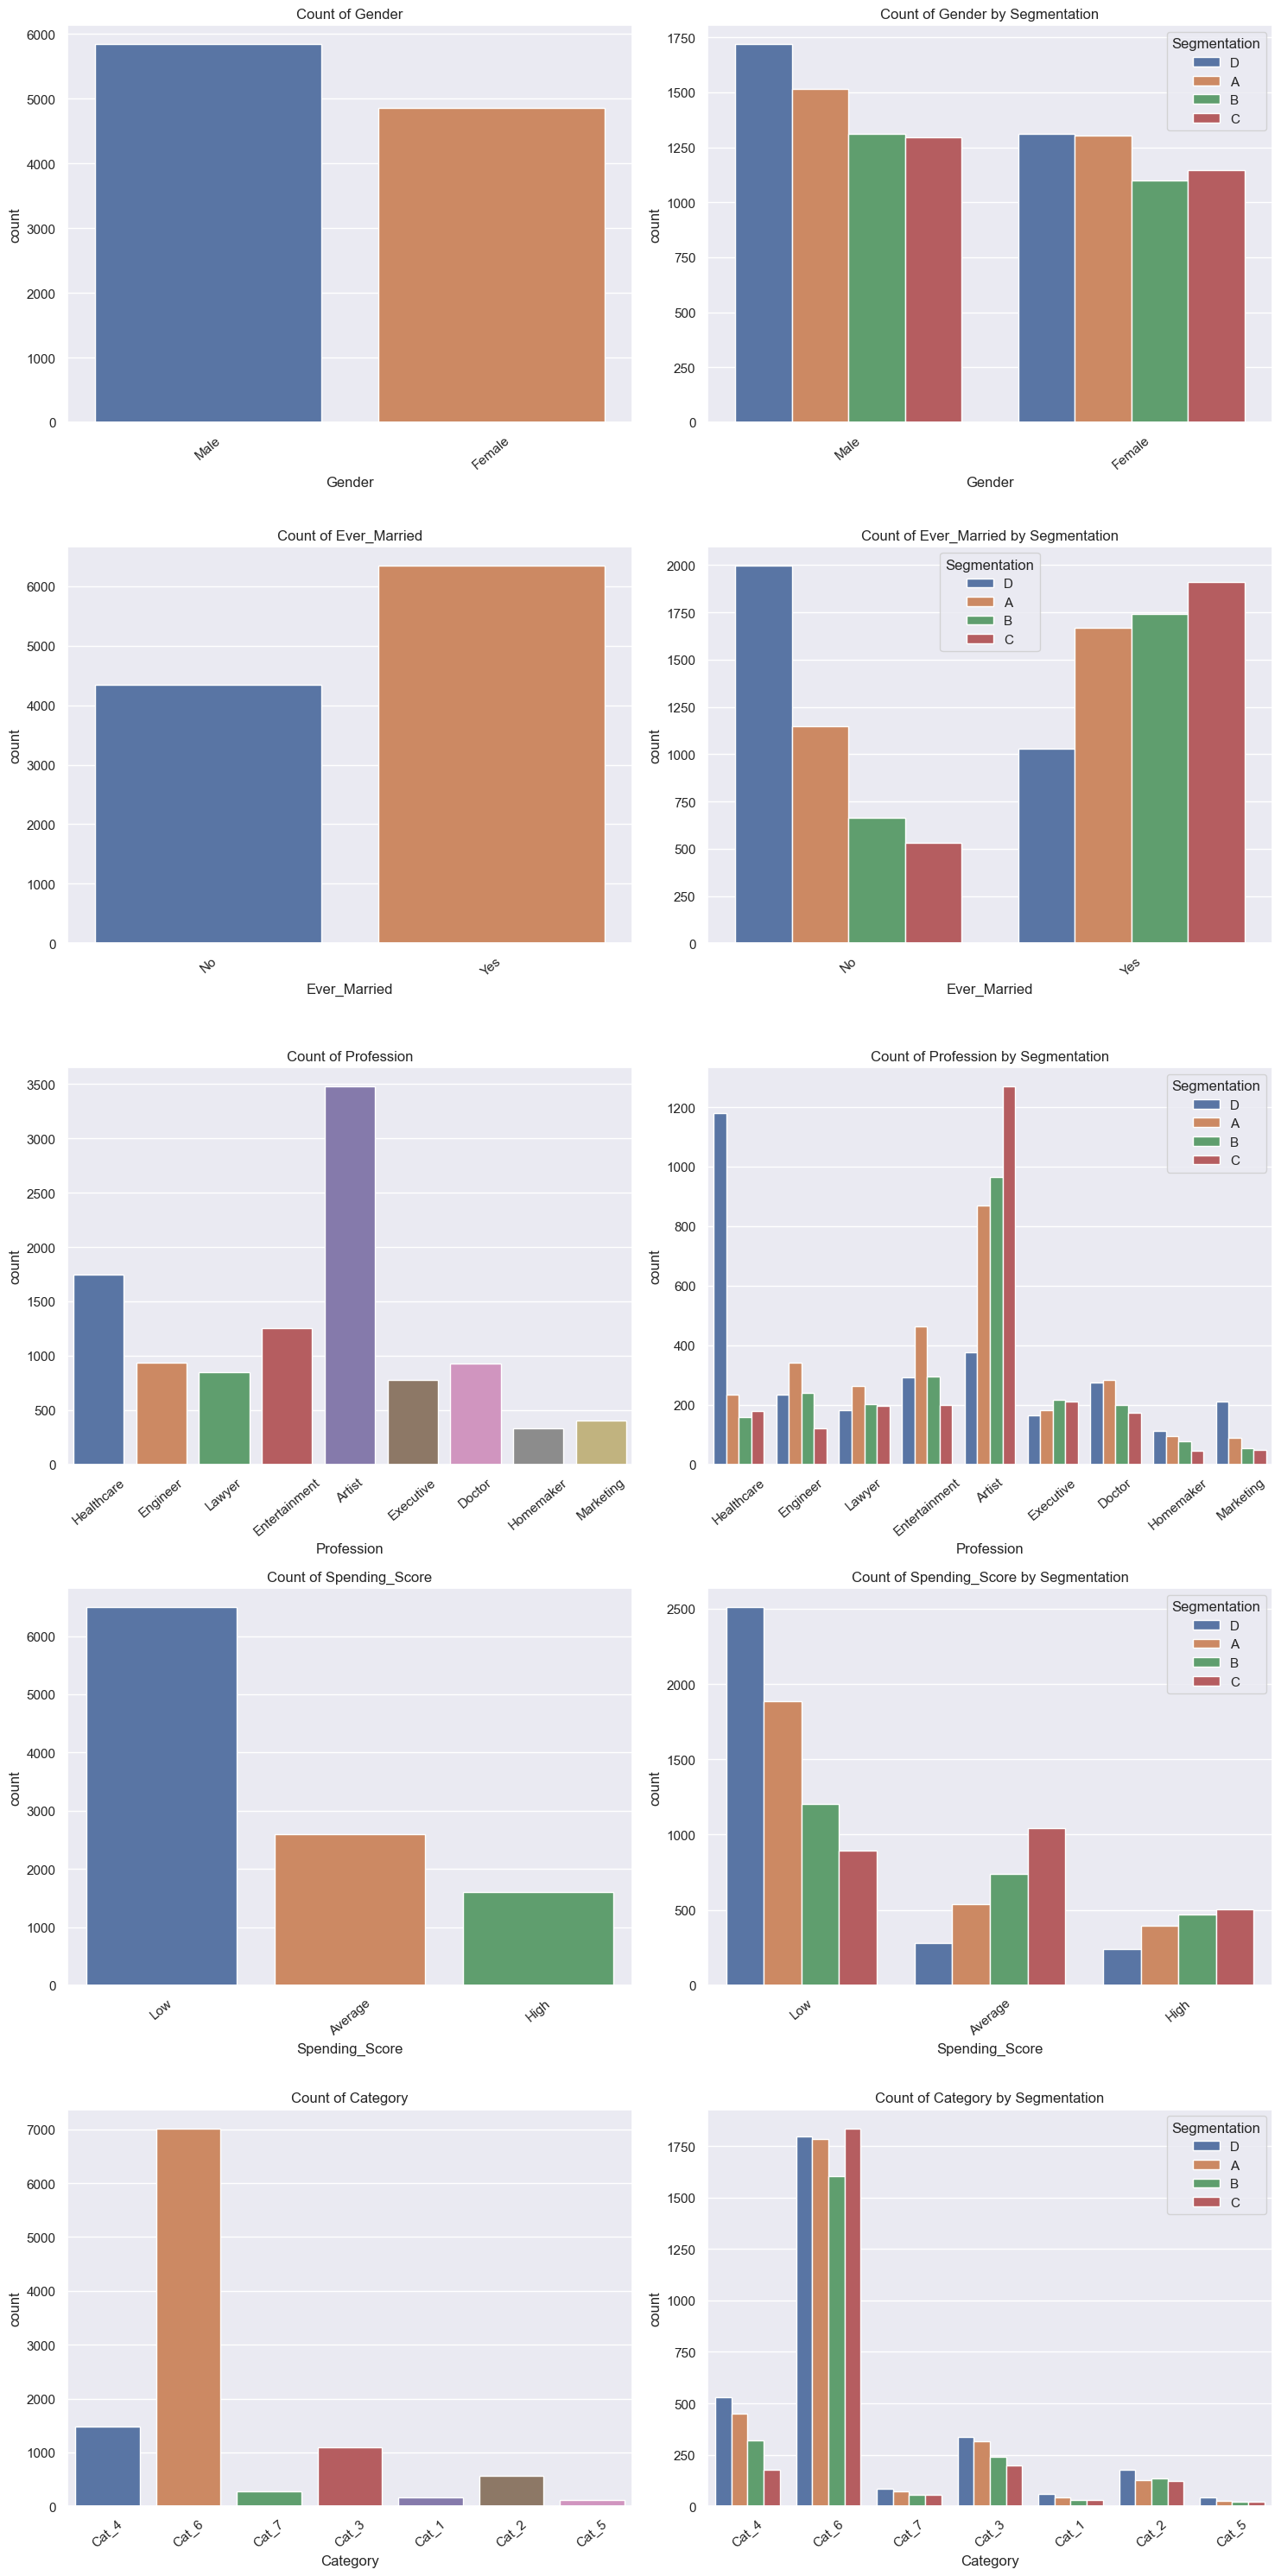

In [90]:
features = ['Gender', 'Ever_Married', 'Profession', 'Spending_Score', 'Category']
fig, axs = plt.subplots(len(features), 2, figsize=(15, 30))
for i, col in enumerate(features):
    # First count plot
    sns.countplot(x=col, data=data, ax=axs[i, 0])
    axs[i, 0].set_title(f'Count of {col}')
    axs[i, 0].tick_params(axis='x', rotation=40)
    
    # Second count plot with hue
    sns.countplot(x=col, hue='Segmentation', data=data, ax=axs[i, 1])
    axs[i, 1].set_title(f'Count of {col} by Segmentation')
    axs[i, 1].tick_params(axis='x', rotation=40)
plt.tight_layout()
plt.show()

**Here are some of the insights derived from the above plots**

**Gender**
- Male population is slightly higher than female

**Ever_Married**
- Count of married customers are higher 
- Segment D seems to have more number of unmarried customers
- Segment C and B have more number of married customers 


 #### Graduated based on Profession

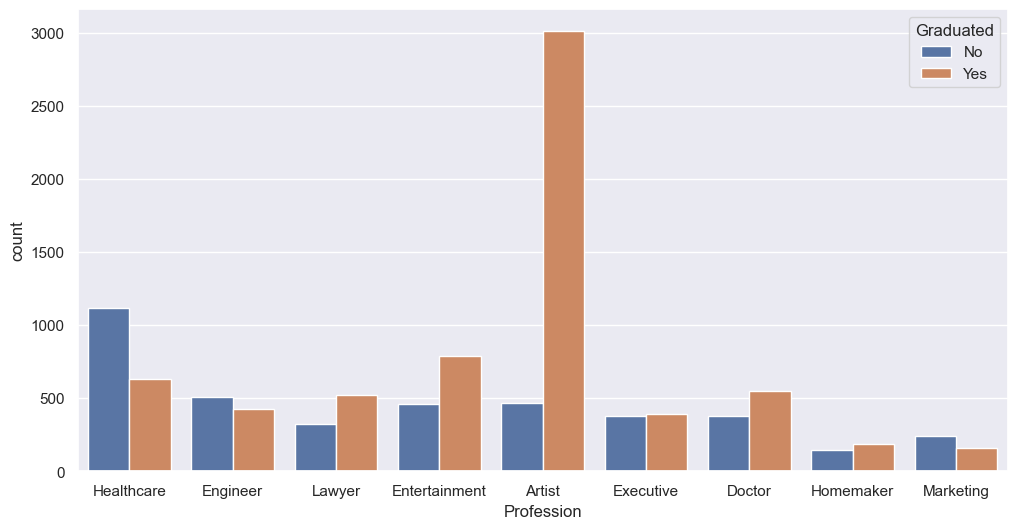

In [91]:
sns.countplot(data=data,x='Profession', hue='Graduated')
plt.show()

## Feature Engineering

Feature engineering is the process of transforming raw data into features that are suitable for machine learning models. Its main aim is to improve model accuracy by providing more meaningful and relevant information. This includes feature creation and feature transformation:

-	  Feature creation: is the process of generating new features based on domain know knowledge and helps improve model performance, increase model robustness, improve model interpretability, and increase model flexibility 

-	 Feature transformation: is the process of transforming the features into suitable representations so that the machine learning can learn effectively from the data. Feature transformation improves model performance, increase model robustness, improve computational efficiency and improve model interpretability. This includes :

** Normalization: rescaling the features to have similar range to prevent some feature from dominating others such as 0 and 1 

** Scaling: is used to transform numerical variables to have similar scale with a mean 0 and standard deviation 1

** Encoding:  this is transforming categorical features into numerical representations. Example label encoding, ordinal encoding and one-hot encoding.
 




###  Ordinal Encoding

In [92]:
 df_customer= pd.DataFrame(data)

In [93]:
df_customer.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [94]:
# ordinal Endcoding for spending score

encoder =OrdinalEncoder(categories=[['Low', 'Average','High']])
df_customer['Spending_Score'] = encoder.fit_transform(df_customer[['Spending_Score']])
df_customer.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,0.0,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,1.0,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,0.0,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,2.0,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,2.0,6.0,Cat_6,A


### Label Encoding

In [95]:
df_customer['Segmentation'].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [96]:
# Label Encoding  for the target varialbe 'Segmentation'

df_customer[['Segmentation']]= df_customer[['Segmentation']].apply(LabelEncoder().fit_transform)

df_customer.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,0.0,4.0,Cat_4,3
1,462643,Female,Yes,38,Yes,Engineer,1.0,1.0,3.0,Cat_4,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,0.0,1.0,Cat_6,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,2.0,2.0,Cat_6,1
4,462669,Female,Yes,40,Yes,Entertainment,1.0,2.0,6.0,Cat_6,0


In [97]:
# Label encoder on profession  and Category features

df_customer[['Profession']]= df_customer[['Profession']].apply(LabelEncoder().fit_transform)

df_customer[['Category']]= df_customer[['Category']].apply(LabelEncoder().fit_transform)


df_customer.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,462809,Male,No,22,No,5,1.0,0.0,4.0,3,3
1,462643,Female,Yes,38,Yes,2,1.0,1.0,3.0,3,0
2,466315,Female,Yes,67,Yes,2,1.0,0.0,1.0,5,1
3,461735,Male,Yes,67,Yes,7,0.0,2.0,2.0,5,1
4,462669,Female,Yes,40,Yes,3,1.0,2.0,6.0,5,0


In [98]:
# conver categorical variables [ Gender, Graduated , Ever_Married ] using predefined mapping to Numerical values 

df_customer['Gender']= df_customer['Gender'].map({'Male':0, 'Female':1})

df_customer['Graduated']= df_customer['Graduated'].map({'No':0, 'Yes':1})

df_customer['Ever_Married']= df_customer['Ever_Married'].map({'No':0, 'Yes':1})





In [99]:
df_customer.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,462809,0,0,22,0,5,1.0,0.0,4.0,3,3
1,462643,1,1,38,1,2,1.0,1.0,3.0,3,0
2,466315,1,1,67,1,2,1.0,0.0,1.0,5,1
3,461735,0,1,67,1,7,0.0,2.0,2.0,5,1
4,462669,1,1,40,1,3,1.0,2.0,6.0,5,0


 ### Feature selection

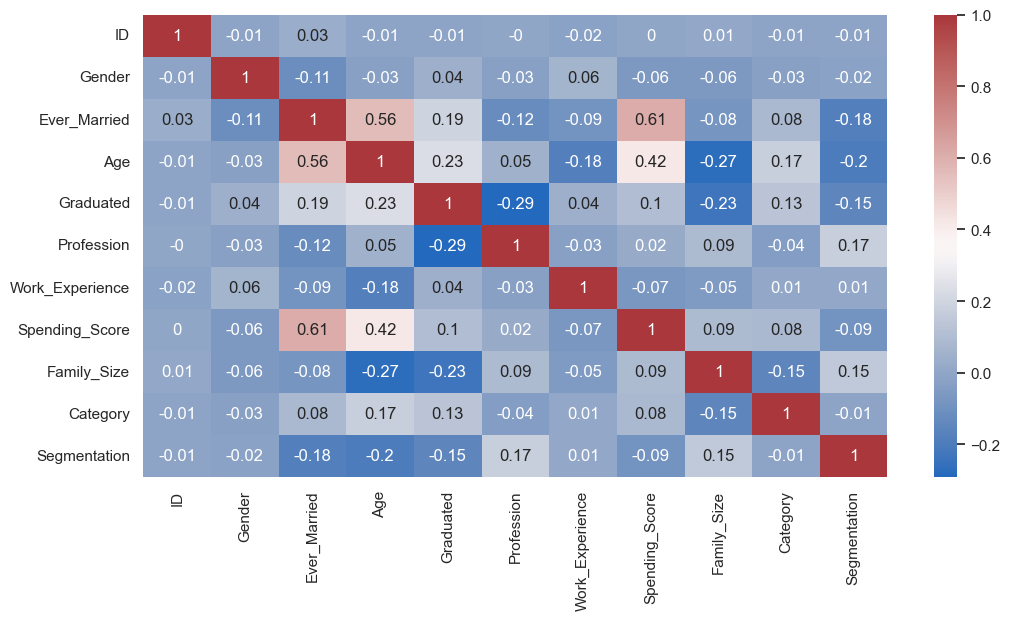

In [100]:
# let's check the correlation matrix to visualize how much correltion exist between variables

matrix= df_customer.corr().round(2)
sns.heatmap(matrix,annot=True, cmap='vlag')
plt.show()

    



In [101]:
x= df_customer.drop('Segmentation', axis=1)
y= df_customer['Segmentation']

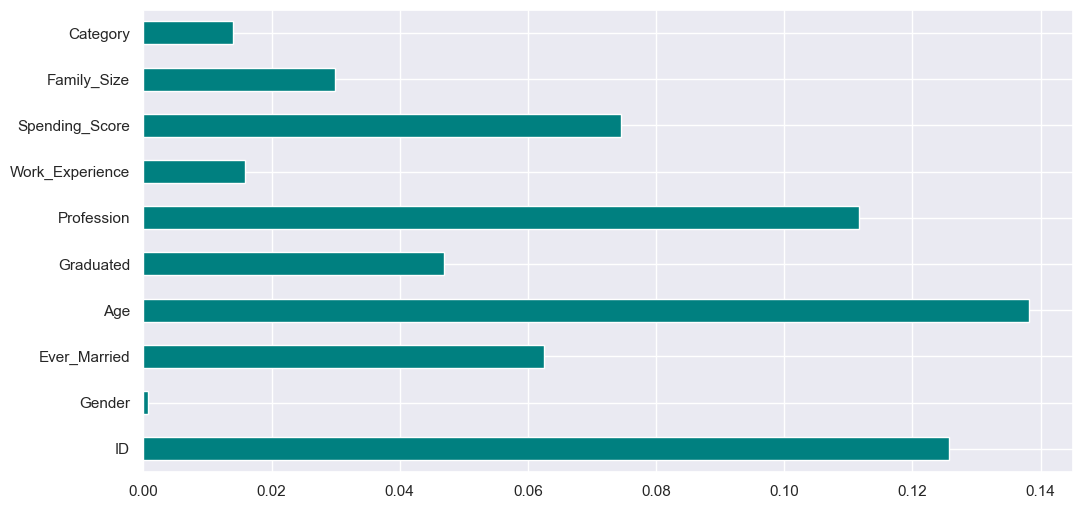

In [102]:
# Let’s identify the columns that significantly influence the segmentation column (the target variable) using 
# mutual information tool from scikit learn package. By checking the values, we will drop columns with little 
# to no influence

importances= mutual_info_classif(x,y)
feature_importances= pd.Series(importances, df_customer.columns[0:len(df_customer.columns)-1])
feature_importances.plot(kind='barh',color='teal')
plt.show()

 From the above feature important graph, we learn that gender doe does not have any influence on the target variable so let drop it. We need also to drop the ID columns as it is not relevant to our analysis.
 

###  Splitting the dataset into training and testing 

In [103]:
x= df_customer.drop(['ID','Segmentation', 'Gender'], axis=1)
y= df_customer['Segmentation']

In [104]:
x.head()

,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category
0,0,22,0,5,1.0,0.0,4.0,3
1,1,38,1,2,1.0,1.0,3.0,3
2,1,67,1,2,1.0,0.0,1.0,5
3,1,67,1,7,0.0,2.0,2.0,5
4,1,40,1,3,1.0,2.0,6.0,5


In [105]:
y.head()

0    3
1    0
2    1
3    1
4    0
Name: Segmentation, dtype: int32

In [106]:
# split the data into 80% training and 20% testing with random state of 42 to guarantees reproducibility

x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42)

### Feature Scaling

Many machine learning algorithms like logistic regression, KNN, random forest, etc. require data scaling to produce good results.  For this reason, I will use standard scaler to standardize the features.  standard scaler transforms the distribution of each feature to have mean of zero and standard deviation of one. It standardizes features by subtracting the mean value from the feature and dividing the result by the feature standard deviation. This ensures that all features are on the same scale, preventing any single feature from dominating the learning process due to its large magnitude.

Z=x−μ/σ

were 
- x represents the original feature value, 
- μ is the mean of the feature, 
- σ is the standard deviation, and 
- z is the standardized feature value




In [107]:
# Apply standardization using Standard Scaler 

scaler = StandardScaler()

x_train= scaler.fit_transform(x_train)

x_test= scaler.transform(x_test)

In [108]:
print(x_train)

[[ 0.82819764  0.80592706  0.78146834 ...  0.61904208  0.75795662
   0.60476194]
 [ 0.82819764 -0.20893527  0.78146834 ...  0.61904208 -0.56823496
   0.60476194]
 [ 0.82819764 -0.02984191  0.78146834 ...  0.61904208  0.75795662
  -0.80590959]
 ...
 [-1.20744126 -0.74621532 -1.27964237 ... -0.73280172  0.75795662
   0.60476194]
 [-1.20744126 -0.20893527  0.78146834 ... -0.73280172 -1.23133075
   0.60476194]
 [-1.20744126 -0.98500646  0.78146834 ... -0.73280172  4.07343558
   0.60476194]]


##  Model Development and Prediction

### Logistic Regression

In [109]:
# Instantiate the model 

logreg= LogisticRegression( max_iter=6000, multi_class='ovr',solver='lbfgs', random_state=42)

# fit the model with data

logreg.fit(x_train,y_train)

y_pred_lr= logreg.predict(x_test)


#### Model Evaluation

 The accuracy score for Logistic regression is 44.55 %
              precision    recall  f1-score   support

           0       0.38      0.37      0.38       584
           1       0.29      0.06      0.10       490
           2       0.42      0.61      0.50       472
           3       0.53      0.71      0.61       593

    accuracy                           0.45      2139
   macro avg       0.41      0.44      0.39      2139
weighted avg       0.41      0.45      0.40      2139

[[217  36 147 184]
 [170  28 190 102]
 [ 88  16 287  81]
 [ 97  15  60 421]]


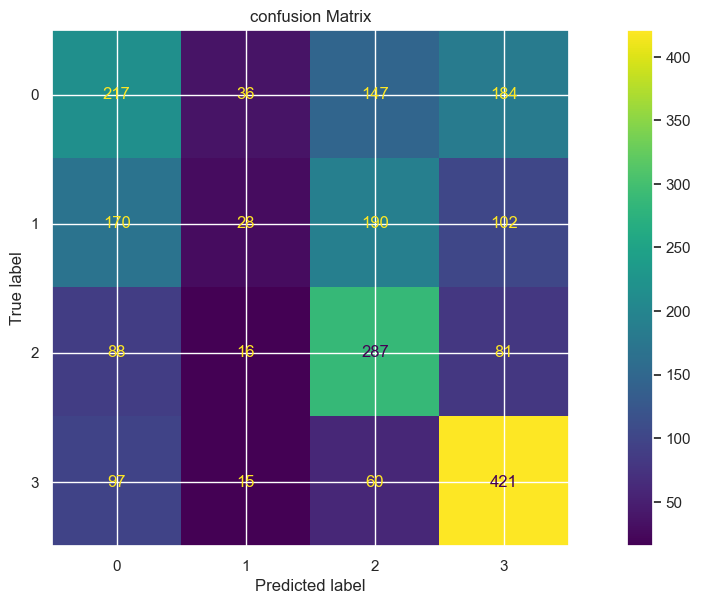

In [110]:

LRACC= accuracy_score(y_pred_lr,y_test)

print(f" The accuracy score for Logistic regression is {(accuracy_score(y_test,y_pred_lr)*100).round(2)} %")


# Classification report

print(classification_report(y_test,y_pred_lr))



#  Confusion Matrix

cm =confusion_matrix(y_test,y_pred_lr)

print(cm)

# visualizing confusion matrix usig heatmap

ConfusionMatrixDisplay(cm).plot()
plt.tight_layout()
plt.title('confusion Matrix')

plt.show()


### K-Nearest Neighbor(KNN)

K-nearest neighbor or K-NN   is used to solve the classification model problem, by creating an imaginary boundary to classify the data.  Lager k means smother curves of separation resulting less complex model whereas smaller K tends to overfit the data and leads to complex modes.


Text(0, 0.5, 'Accuracy Score')

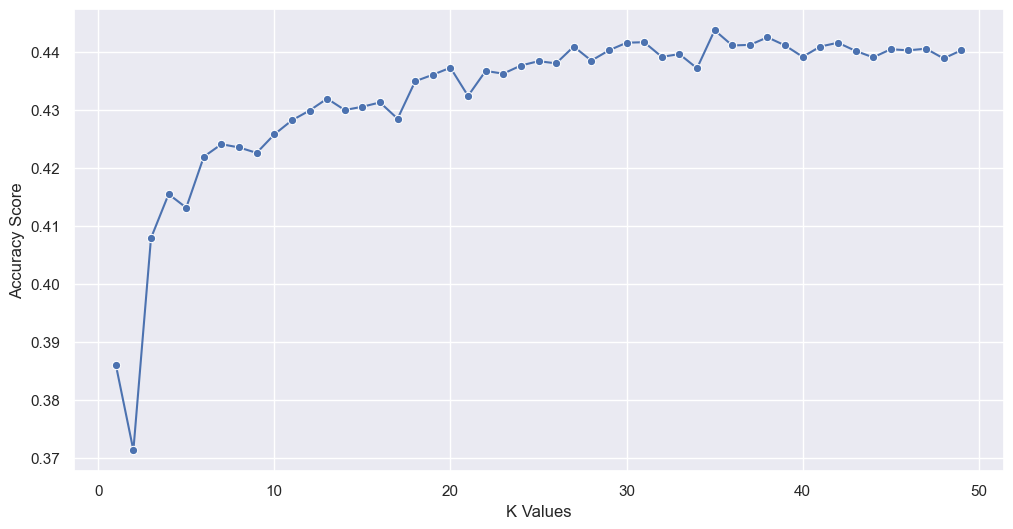

In [111]:
 # lets find he best value of K uisng cross validation
    
k_values=  [i for i in range(1,50)]  
scores= []
for k in k_values:
    knn= KNeighborsClassifier(n_neighbors=k)
    score= cross_val_score(knn,x,y,cv=5)
    scores.append(np.mean(score))
    
    
sns.lineplot(x= k_values,y= scores, marker ='o')  
plt.xlabel('K Values')
plt.ylabel('Accuracy Score')

In [112]:
# Instantiate the model 

knn= KNeighborsClassifier(n_neighbors= 21)


# fit the model with the data

knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

##### Model Evaluation

In [113]:
accuracy =accuracy_score(y_test, y_pred_knn)


print(f" The accuracy score for K-NN  is {(accuracy_score(y_test,y_pred_knn)*100).round(2)} %")

 The accuracy score for K-NN  is 46.0 %


              precision    recall  f1-score   support

           0       0.40      0.41      0.40       584
           1       0.36      0.30      0.33       490
           2       0.47      0.47      0.47       472
           3       0.58      0.63      0.60       593

    accuracy                           0.46      2139
   macro avg       0.45      0.45      0.45      2139
weighted avg       0.45      0.46      0.46      2139

[[241 118  96 129]
 [143 148 122  77]
 [ 83 102 224  63]
 [143  41  38 371]]


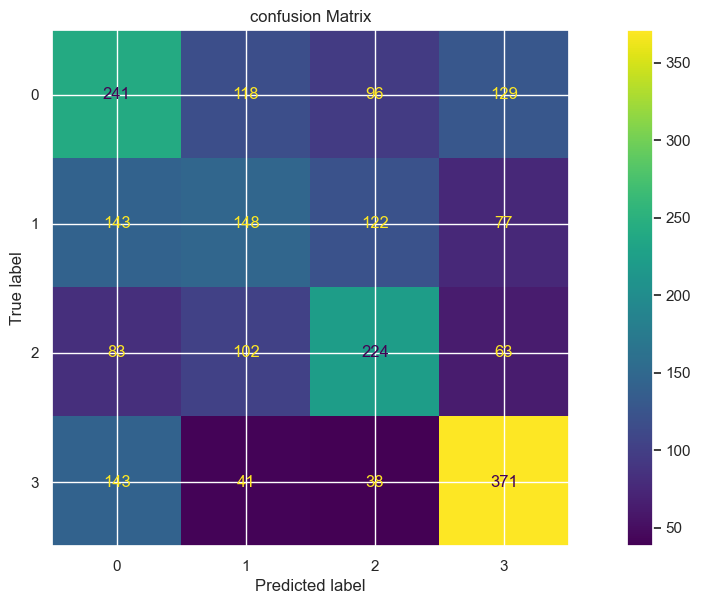

In [114]:
# Classification report

print(classification_report(y_test,y_pred_knn))



#  Confusion Matrix

cm =confusion_matrix(y_test,y_pred_knn)

print(cm)

# visualizing confusion matrix usig heatmap

ConfusionMatrixDisplay(cm).plot()
plt.tight_layout()
plt.title('confusion Matrix')

plt.show()


### Support Vector Machine (SVM)

Support vector machine (SVM) is a powerful machine learning algorithm used for linear or nonlinear classification, regression and for outlier detection.  It is adaptable and efficient in many applications as it can handle high dimensional data and nonlinear relationships.  The main aim of the SVM algorithm is to find optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space.

In [115]:
 # hyper parametre tuning
    
#estimator= SVC()   
#param_grid= {"c":[1,3,5,7,9],"kernel":["linear","polynomial","rbf","sigmoid"]}
#model1= GridSearchCV(estimator, param_grid,cv=5, scoring="accuracy")
#model1.fit(x_train,y_train)
#model1.best_params_
                     

In [116]:
#Instantiate the model

svm= SVC(C=2, kernel='rbf')
svm.fit(x_train,y_train)

y_pred_svm= svm.predict(x_test)

#### Model Evaluation

In [117]:
accuracy =accuracy_score(y_test, y_pred_svm)


print(f" The accuracy score for SVM  is {(accuracy_score(y_test,y_pred_svm)*100).round(2)} %")

 The accuracy score for SVM  is 47.64 %


              precision    recall  f1-score   support

           0       0.40      0.47      0.43       584
           1       0.41      0.27      0.33       490
           2       0.48      0.50      0.49       472
           3       0.59      0.64      0.61       593

    accuracy                           0.48      2139
   macro avg       0.47      0.47      0.46      2139
weighted avg       0.47      0.48      0.47      2139

[[274  80  99 131]
 [162 133 118  77]
 [ 98  80 234  60]
 [146  31  38 378]]


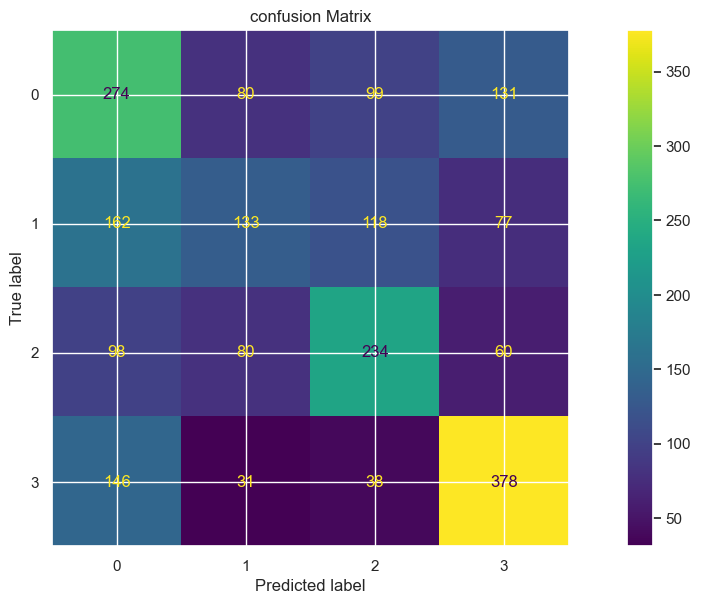

In [118]:
# Classification report

print(classification_report(y_test,y_pred_svm))



#  Confusion Matrix

cm =confusion_matrix(y_test,y_pred_svm)

print(cm)

# visualizing confusion matrix usig heatmap

ConfusionMatrixDisplay(cm).plot()
plt.tight_layout()
plt.title('confusion Matrix')

plt.show()


### Decision Tree

decision trees combine multiple points and weigh degrees of uncertainty to determine the best approach to a complex decision.  It allows us to break down information into multiple variables to arrive at a the best single one to the problem. It also helps companies to create informed opinions that facilitate better decision making. 

Random forest algorithm differ from decision trees in their ability to form several decisions in order  to reach  a final  decision, it goes a step  further and don’t rely on a single decision like decision tree. 


#### Hyper parametre Tuning

In [119]:
   
estimator= DecisionTreeClassifier()
param_grid= {'criterion': ['gini','entropy']}
model=GridSearchCV(estimator,param_grid,cv=5, scoring='accuracy')
model.fit(x_train,y_train)
model.best_params_


{'criterion': 'entropy'}

In [120]:
# Instantiate the model

dt= DecisionTreeClassifier(criterion='gini')


# fit the model with  data 

dt.fit(x_train,y_train)
y_pred_dt= dt.predict(x_test)

#### Model Evaluation

In [121]:
accuracy =accuracy_score(y_test, y_pred_dt)

print(f" The accuracy score for Decision tree  is {(accuracy_score(y_test,y_pred_dt)*100).round(2)} %")


 The accuracy score for Decision tree  is 37.26 %


              precision    recall  f1-score   support

           0       0.32      0.32      0.32       584
           1       0.27      0.28      0.27       490
           2       0.39      0.38      0.38       472
           3       0.51      0.49      0.50       593

    accuracy                           0.37      2139
   macro avg       0.37      0.37      0.37      2139
weighted avg       0.38      0.37      0.37      2139

[[187 161 105 131]
 [147 137 111  95]
 [118 122 180  52]
 [141  89  70 293]]


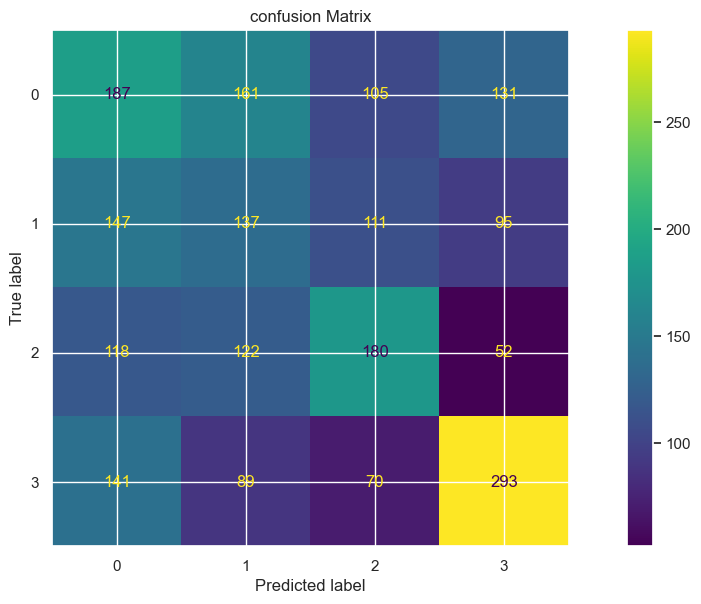

In [122]:
# Classification report

print(classification_report(y_test,y_pred_dt))



#  Confusion Matrix

cm =confusion_matrix(y_test,y_pred_dt)

print(cm)

# visualizing confusion matrix usig heatmap

ConfusionMatrixDisplay(cm).plot()
plt.tight_layout()
plt.title('confusion Matrix')

plt.show()


### Random Forest

#### Hyper parameter Tuning

In [123]:
estimator= RandomForestClassifier( random_state=42)
param_grid= {'n_estimators': list(range(1,50))}
model=GridSearchCV(estimator,param_grid,cv=5, scoring='accuracy')
model.fit(x_train,y_train)
model.best_params_


{'n_estimators': 46}

In [124]:
# Instantiate the model

rf= RandomForestClassifier(n_estimators= 46)


# fit the model with  data 

rf.fit(x_train,y_train)
y_pred_rf= rf.predict(x_test)

#### Model Evaluation

 The accuracy score for Random Forest  is 41.28 %

              precision    recall  f1-score   support

           0       0.36      0.35      0.36       584
           1       0.31      0.29      0.30       490
           2       0.43      0.42      0.43       472
           3       0.52      0.57      0.54       593

    accuracy                           0.41      2139
   macro avg       0.40      0.41      0.41      2139
weighted avg       0.41      0.41      0.41      2139

[[203 128  97 156]
 [139 142 114  95]
 [ 94 115 200  63]
 [123  74  58 338]]


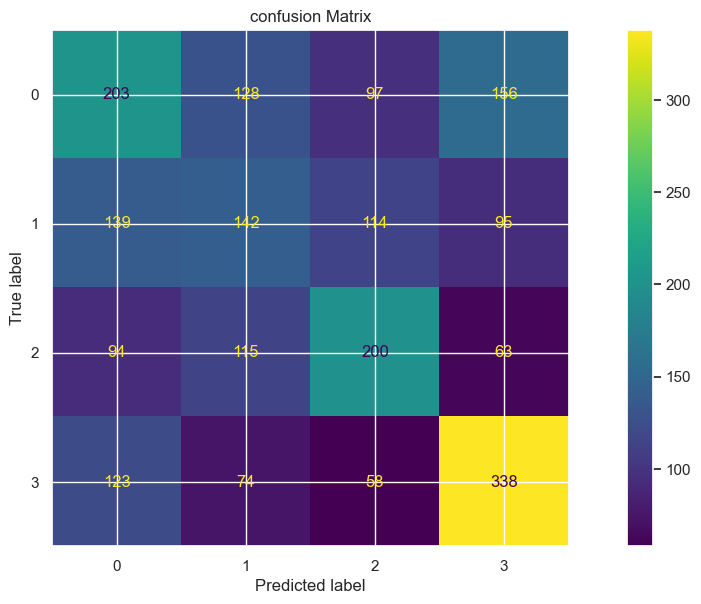

In [125]:
accuracy =accuracy_score(y_test, y_pred_rf)


print(f" The accuracy score for Random Forest  is {(accuracy_score(y_test,y_pred_rf)*100).round(2)} %\n")




# Classification report

print(classification_report(y_test,y_pred_rf) )



#  Confusion Matrix

cm =confusion_matrix(y_test,y_pred_rf)

print(cm)

# visualizing confusion matrix usig heatmap

ConfusionMatrixDisplay(cm).plot()
plt.tight_layout()
plt.title('confusion Matrix')

plt.show()





#### Summary

 According to the performance metrics  support vector machine achieve the highest accuracy which is 47.64% whereas Decision tree achieve the lowest accuracy which is 37.4%
 
- 	Logistic regression achieved an accuracy of 44.55% 

-   K-Nearest Neighbors (KNN) achieved an accuracy of 46%
- 	Support vector machine (SVM) achieved an accuracy of 47.64%
- 	Decision tree achieved an accuracy of 37.4%
- 	Random Forest achieved an accuracy of 41.75%


**I chose Random Forest for predicting customer behavior despite it accuracy of 41% due to several key points**

 •	**Robustness**: Random Forest is known for its robustness to overfitting, especially when dealing with high-dimensional data. Its ensemble nature helps to reduce variance, making it more reliable in diverse datasets.
 
•	**Feature Importance**: Random Forest provides insights into feature importance, allowing you to understand which variables significantly influence customer behavior. This can be crucial for strategic decision-making.

•	**Handling Missing Data**: Random Forest can handle missing values more effectively than some other algorithms. It can maintain accuracy even when a portion of the data is missing, which is often the case in customer datasets.

•	**Lower Sensitivity to Outliers**: Random Forest is less sensitive to outliers compared to models like Logistic Regression and Decision Trees, making it a better choice for real-world datasets that may contain noise.

•	**Ensemble Learning**: The ensemble approach of Random Forest combines the predictions of multiple decision trees, leading to better generalization on unseen data compared to single models.

•	**Tuning Potential**: While the initial accuracy might not be the highest, Random Forest has various hyperparameters that can be tuned (e.g., number of trees, depth of trees) to potentially improve performance further.



**Hyperparameter Tuning - GridSearchCV** 

First, let’s use GridSearchCV to obtain the best parameters for the model. For that, we will pass RandomFoestClassifier() instance to the model and then fit the GridSearchCV using the training data to find the best parameters.

In [126]:
estimator= RandomForestClassifier( random_state=42)
param_grid= {'n_estimators': list(range(1,50))}
model=GridSearchCV(estimator,param_grid,cv=5, scoring='accuracy')
model.fit(x_train,y_train)
model.best_params_


{'n_estimators': 46}

In [127]:
# Instantiate the model

rf= RandomForestClassifier(n_estimators= 41)


# fit the model with  data 

rf.fit(x_train,y_train)
y_pred_rf= rf.predict(x_test)

In [128]:
accuracy =accuracy_score(y_test, y_pred_rf)


print(f" The accuracy score for Random Forest  is {(accuracy_score(y_test,y_pred_rf)*100).round(2)} %\n")

 The accuracy score for Random Forest  is 40.67 %



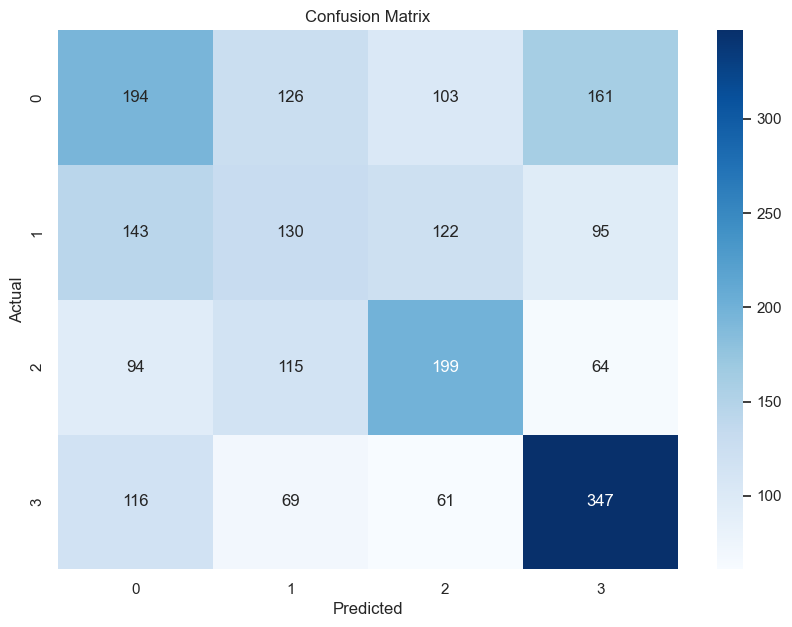

In [129]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [130]:
# Classification Report
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

**Interpretation of the performance metrics** 

**Confusion Matrix**

1	**True Positives (TP)**

• Segment A: 252 instances were correctly predicted as A.

• Segment B: 130 instances were correctly predicted as B.

• Segment C: 256 instances were correctly predicted as C.

• Segment D: 396 instances were correctly predicted as D.

2. **False Negatives (FN)**

•	For A: 88 instances were misclassified as B, 95 as C, and 149 as D. Total FN for A = 88 + 95 + 149 = 332.

•	For B: 151 instances were misclassified as A, 126 as C, and 83 as D. Total FN for B = 151 + 126 + 83 = 360.

•	For C: 75 instances were misclassified as A, 81 as B, and 60 as D. Total FN for C = 75 + 81 + 60 = 216.

•	For D: 130 instances were misclassified as A, 39 as B, and 28 as C. Total FN for D = 130 + 39 + 28 = 197

3.**False Positives (FP)**

•	For A: 151 instances of B, 75 instances of C, and 130 instances of D were incorrectly predicted as A. Total FP for A = 151 + 75 + 130 = 356.
•	For B: 88 instances of A, 81 instances of C, and 39 instances of D were incorrectly predicted as B. Total FP for B = 88 + 81 + 39 = 208.
•	For C: 95 instances of A, 126 instances of B, and 28 instances of D were incorrectly predicted as C. Total FP for C = 95 + 126 + 28 = 249.
•	For D: 149 instances of A, 83 instances of B, and 60 instances of C were incorrectly predicted as D. Total FP for D = 149 + 83 + 60 = 292.


**Summary of Findings**

•**High True Positives**: Segments C and D show strong identification with 256 and 396 correct predictions, indicating good model performance for these segments.

•**False Negatives**: Segments A and B have substantial false negatives, particularly A with 332 misclassified instances, suggesting that the model struggles with these segments.

•**False Positives**: The model also misclassifies instances across segments, notably segment A having 356 instances incorrectly predicted from other segments.




**Recommendations for Improvement**

1.**Feature Engineering**: Examine and possibly refine features to improve model performance, particularly for segments A and B.

2.**Hyperparameter Tuning**: Explore different hyperparameter settings for the Random Forest model to find an optimal configuration.

3.**Class Imbalance**: Check if any segments are underrepresented and consider techniques like oversampling or under sampling
